In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [2]:
w1 = np.random.random([3,2])
w2 = np.random.random([3,1])
w1_init = w1.copy()
w2_init = w2.copy()

input,y = np.array([[0,0],[0,1],[1,0],[1,1]]),np.array([0,1,1,0])
y = y.reshape(len(input),1)

if len(input.shape)<2:
    input = input.reshape(1,len(input))
bias = np.ones([input.shape[0],1])
x = np.concatenate([bias,input],axis=1)
x.shape,y.shape

((4, 3), (4, 1))

In [3]:
def inference(x,w1,w2):
    p1 = x@w1
    a1 = sigmoid(p1)
    h = np.concatenate([bias,a1],axis=1)
    p2 = h@w2
    y = sigmoid(p2)
    return y
inference(x,w1,w2)

array([[0.76188237],
       [0.77295996],
       [0.76417783],
       [0.77439419]])

In [4]:
def error(y_pred,y_real):
    return np.sum((y_real-y_pred)**2)

In [5]:
def gradients(x,w1,w2,y):
    if len(x.shape)<2:
        x = x.reshape(1,len(x))
    if len(y.shape)<2:
        y = y.reshape(1,len(y))
    targets = np.zeros(1)

    # inference
    p1 = x@w1
    a1 = sigmoid(p1)
    h = np.concatenate([bias,a1],axis=1)
    p2 = h@w2
    preds = sigmoid(p2)
    y_pred = np.where(preds>0.5,1,0)
    # final layer
    diff = y - preds
    grad_diff = preds*(1-preds)
    # diff = diff.sum(axis=1)
    # grad_diff = grad_diff.sum(axis=1)
    deltas2 = h.T@(diff*grad_diff) #a1 or p1? probably p1

    # first layer
    deltas1=  x.T@a1
    return deltas1,deltas2
dw1,dw2 = gradients(x,w1,w2,y)
dw1.shape,dw2.shape

((3, 2), (3, 1))

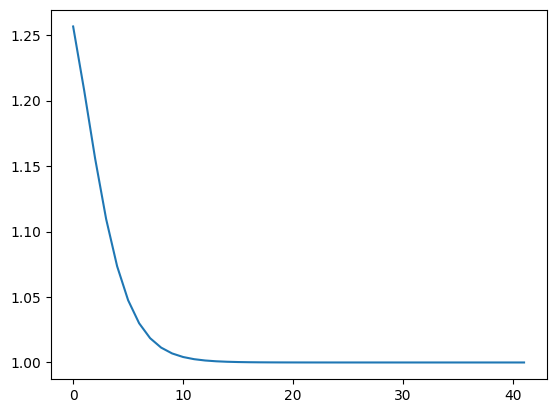

In [18]:
losses = []
def backpropagation(x,w1,w2,y,lr=0.3):
    w1,w2 = w1_init.copy(),w2_init.copy()
    for _ in range(42):
        dw1, dw2 = gradients(x,w1,w2,y)
        w1 += lr*dw1
        w2 += lr*dw2
        pred = inference(x,w1,w2)
        loss = error(pred,y)
        losses.append(loss)
backpropagation(x,w1,w2,y)
plt.plot(losses)